In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


# importer le dataset

df=pd.read_excel('TMC_encode.xlsx')

y =df['Résultat_dépistage']

X=df.drop(['Résultat_dépistage'],axis=1)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

2024-08-12 06:48:50.649684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 06:48:50.655451: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 06:48:50.678818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 06:48:50.714281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 06:48:50.723655: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 06:48:53.628540: W tensorflow/compiler/tf2tensorrt/utils/p

### Modèle DNN

/home/noatech/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4701 - loss: 0.8516 - val_accuracy: 0.6304 - val_loss: 0.6364
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5589 - loss: 0.6904 - val_accuracy: 0.6594 - val_loss: 0.6003
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6313 - loss: 0.6404 - val_accuracy: 0.7355 - val_loss: 0.5579
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6572 - loss: 0.5980 - val_accuracy: 0.7609 - val_loss: 0.5122
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7140 - loss: 0.5361 - val_accuracy: 0.8116 - val_loss: 0.4631
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7141 - loss: 0.5200 - val_accuracy: 0.8587 - val_loss: 0.4201
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7534 - loss: 0.5042 - val_accuracy: 0.8732 - val_loss: 0.3937
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7632 - loss: 0.4810 - val_accuracy: 0.8768 - val_loss

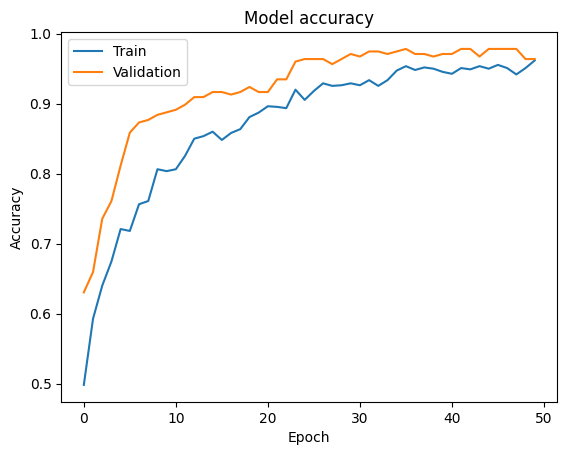

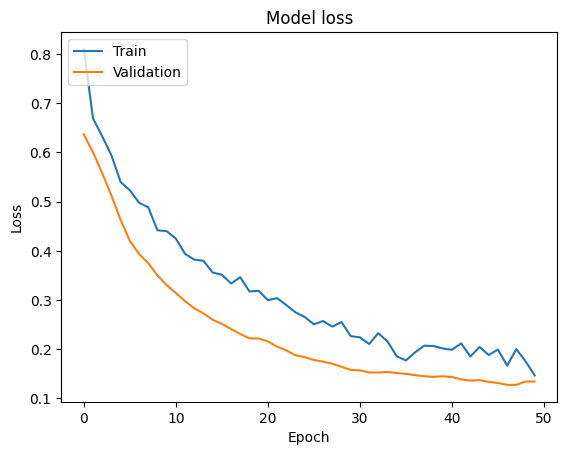

In [2]:
# Construction du modèle DNN
model = Sequential()

# Ajout des couches du réseau
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout pour réduire le surapprentissage
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Couche de sortie avec activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Évaluation du modèle sur l'ensemble de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Affichage des résultats
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Vous pouvez aussi visualiser l'évolution de l'accuracy et de la perte (loss) au cours de l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Validation croisée

In [3]:

from sklearn.model_selection import KFold

# Définition du nombre de folds pour la validation croisée
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Pour stocker les scores d'accuracy pour chaque fold
accuracy_scores = []

# Fonction pour créer un modèle DNN
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Boucle de validation croisée
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Création du modèle
    model = create_model()
    
    # Entraînement du modèle
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Évaluation du modèle
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Calcul de l'accuracy pour ce fold
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"Fold Accuracy: {acc}")

# Affichage des résultats de la validation croisée
print(f"Validation Croisée Accuracy Moyenne: {np.mean(accuracy_scores)}")
print(f"Validation Croisée Accuracy Écart-Type: {np.std(accuracy_scores)}")

/home/noatech/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold Accuracy: 0.9563953488372093


/home/noatech/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Fold Accuracy: 0.9534883720930233


/home/noatech/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold Accuracy: 0.9738372093023255


/home/noatech/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Fold Accuracy: 0.9709302325581395


/home/noatech/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold Accuracy: 0.9680232558139535
Validation Croisée Accuracy Moyenne: 0.9645348837209301
Validation Croisée Accuracy Écart-Type: 0.00809790016115353


### Validation croisée avec hyperparamètre